In [2]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


In [4]:
df.shape

(100, 1)

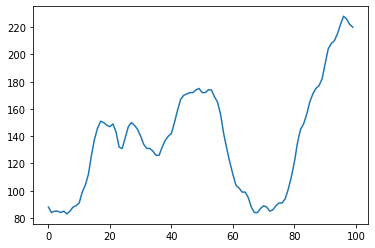

In [5]:
#Original Series
plt.plot(df.value)
plt.show()

In [6]:
def adfuller_test(val):
    
    result = adfuller(val)
    
    labels = ['ADF Test Statistic','p-value','Lags','Number of Observations Used']
    
    for value,label in zip(result,labels):
        
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [7]:
adfuller_test(df.value)

ADF Test Statistic : -2.464239717203369
p-value : 0.12441935447109442
Lags : 3
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


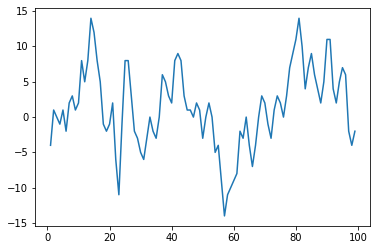

In [8]:
#1st Differencing
df['1st Differencing'] = df.value - df.value.shift(1)
plt.plot(df['1st Differencing'])
plt.show()

In [9]:
adfuller_test(df['1st Differencing'].dropna())

ADF Test Statistic : -2.722238490442951
p-value : 0.07026846015272728
Lags : 2
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


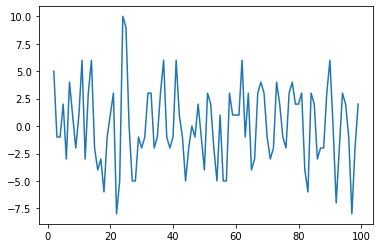

In [10]:
#1st Differencing
df['2nd Differencing'] = df['1st Differencing'] - df['1st Differencing'].shift(1)
plt.plot(df['2nd Differencing'])
plt.show()

In [11]:
adfuller_test(df['2nd Differencing'].dropna())

ADF Test Statistic : -9.929762173626017
p-value : 2.8434287555470966e-17
Lags : 1
Number of Observations Used : 96
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


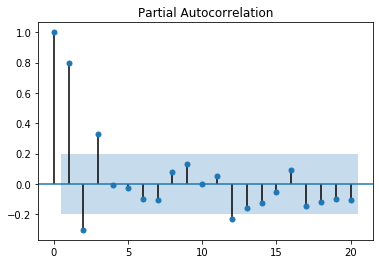

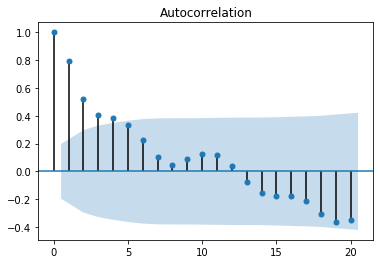

In [17]:
plot_pacf(df['1st Differencing'].dropna())
plot_acf(df['1st Differencing'].dropna())
plt.show()

In [18]:
#(1,2,1)

In [27]:
X = df.value
train = X[:90]
test  = X[90:]

model = ARIMA(train, order=(1,1,1)).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -228.224
Method:                       css-mle   S.D. of innovations              3.119
Date:                Sat, 25 Apr 2020   AIC                            464.447
Time:                        15:14:59   BIC                            474.402
Sample:                             1   HQIC                           468.460
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0191      1.390      0.733      0.466      -1.706       3.744
ar.L1.D.value     0.6541      0.091      7.196      0.000       0.476       0.832
ma.L1.D.value     0.4903      0.102      4.809      0.000       0.290       0.690
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5288           +0.0000j            1.5288            0.0000
MA.1           -2.0397           +0.0000j            2.0397            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
preds,error,conf = model.forecast(10)
preds

array([187.52003736, 191.48331494, 194.42828117, 196.70714717,
       198.55030212, 200.10844875, 201.48016505, 202.72993312,
       203.89993211, 205.01775237])

In [21]:
preds = pd.Series(preds,index=test.index)
preds

90    187.520037
91    191.483315
92    194.428281
93    196.707147
94    198.550302
95    200.108449
96    201.480165
97    202.729933
98    203.899932
99    205.017752
dtype: float64

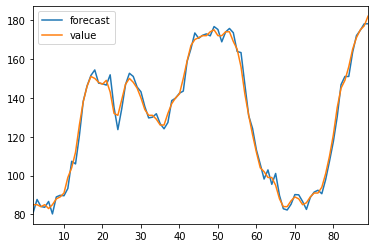

In [22]:
model.plot_predict()
plt.show()

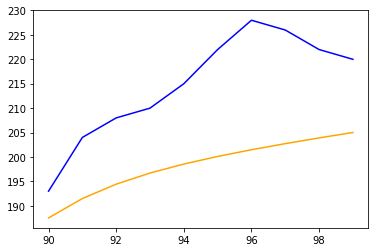

In [24]:
plt.plot(test, color = 'blue')
plt.plot(preds,color = 'orange')
plt.show()